<a href="https://colab.research.google.com/github/Marcelo0479/machinelearn/blob/main/Machine_Learning_lidando_com_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Importando os dados e fazendo os primeiros tratamentos.

In [196]:
import pandas as pd

In [197]:
url = 'https://github.com/alura-cursos/reducao-dimensionalidade/raw/master/data-set/exames.csv'
resultados_exames = pd.read_csv(url)

In [198]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [199]:
resultados_exames.shape

(569, 35)

In [200]:
from sklearn.model_selection import train_test_split
from numpy import random

In [201]:
SEED = 1234

In [202]:
valores_exames = resultados_exames.drop(columns= ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

In [203]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, random_state=SEED)

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
try:
  classificador = RandomForestClassifier(n_estimators= 100)
  classificador.fit(treino_x, treino_y)
  classificador.score(teste_x, teste_y)
except: 
  print('erro por valores nulos ou NAN')

erro por valores nulos ou NAN


In [206]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [207]:
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

# 2 - Primeiro teste com o algoritmo RandomForestClassifier e comparação com o algoritimo DummyClassifier

In [208]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, random_state=SEED, stratify=diagnostico)

In [209]:
classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
classificador.fit(treino_x, treino_y)
acuracia = classificador.score(teste_x, teste_y)
print(f'Resultado da classificação é: {acuracia:.2%}')

Resultado da classificação é: 97.90%


In [210]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

In [211]:
classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
classificador.fit(treino_x, treino_y)
acuracia = classificador.score(teste_x, teste_y)
print(f'Resultado da classificação é: {acuracia:.2%}')

Resultado da classificação é: 97.66%


In [212]:
from sklearn.dummy import DummyClassifier

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
acuracia_bobo = classificador_bobo.score(teste_x, teste_y)
print(f'Resultado da classificação boba é: {acuracia_bobo:.2%}')

Resultado da classificação boba é: 62.57%


In [213]:
dados_plot = resultados_exames.drop(columns= ['id', 'exame_33'])
dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


In [214]:
import seaborn as sns
sns.set(font_scale= 1)
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

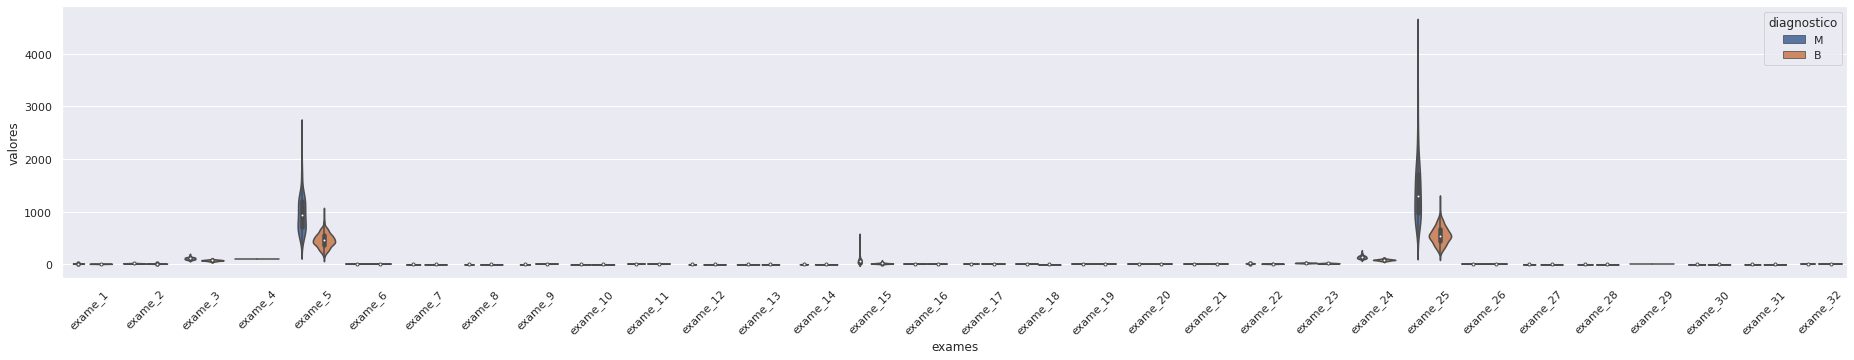

In [215]:
plt.figure(figsize= (32,5))
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico')
plt.xticks(rotation = 45)

# 3 - Padronização dos dados para melhorar a visualização e melhorar a filtragem dos dados.

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)

In [218]:
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [219]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns= valores_exames_v1.keys())
valores_exames_v2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


In [220]:
dados_plot = pd.concat([diagnostico, valores_exames_v2], axis=1)
dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

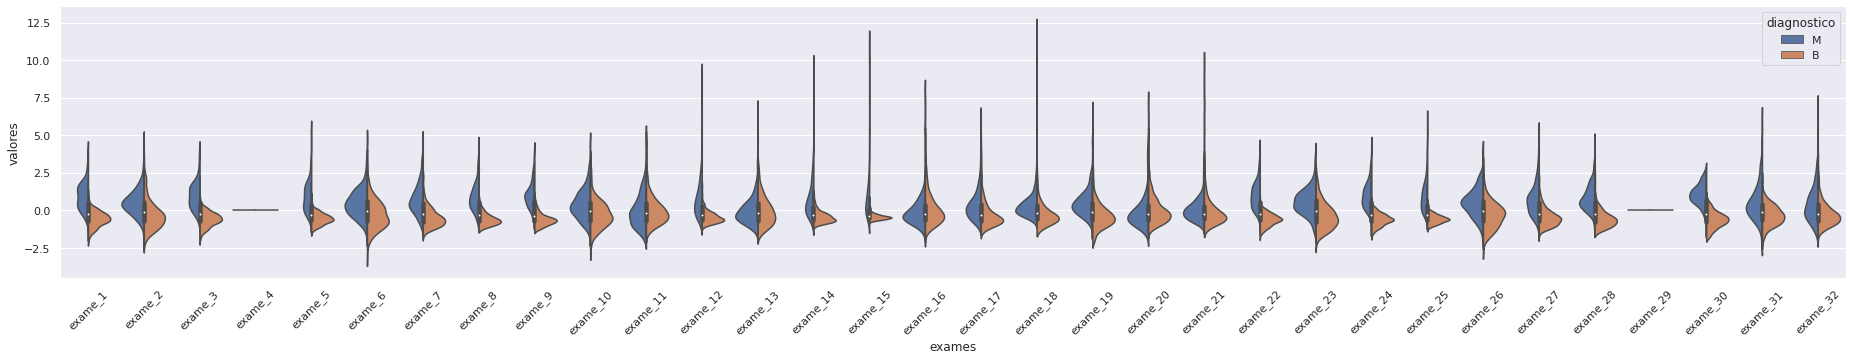

In [221]:
plt.figure(figsize= (32,5))     
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico', split= True)
plt.xticks(rotation = 45)

In [222]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_4', 'exame_29'])

In [223]:
valores_exames_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [224]:
dados_plot = pd.concat([diagnostico, valores_exames_v3], axis=1)
dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

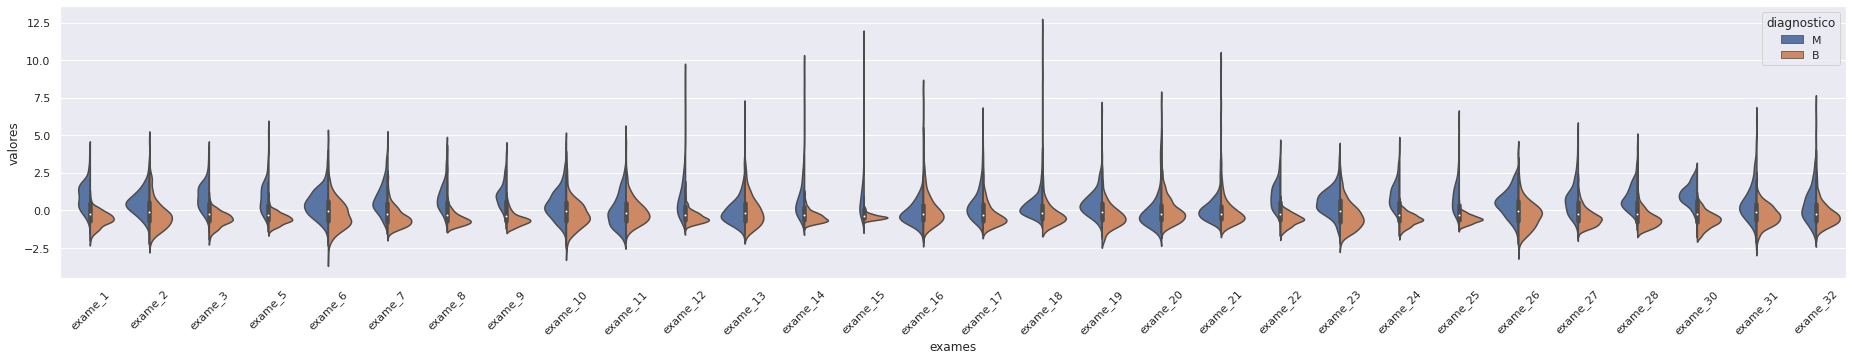

In [225]:
plt.figure(figsize= (32,5))     
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico', split= True)
plt.xticks(rotation = 45)

In [226]:
def classificar(valores):
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

  classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
  classificador.fit(treino_x, treino_y)
  acuracia = classificador.score(teste_x, teste_y)
  print(f'Resultado da classificação é: {acuracia:.2%}')

In [227]:
classificar(valores_exames_v3)

Resultado da classificação é: 97.66%


# 4 - Verrificando a correlação para eliminar as correlações altas demais.

In [228]:
matriz_correlacao = valores_exames_v3.corr()

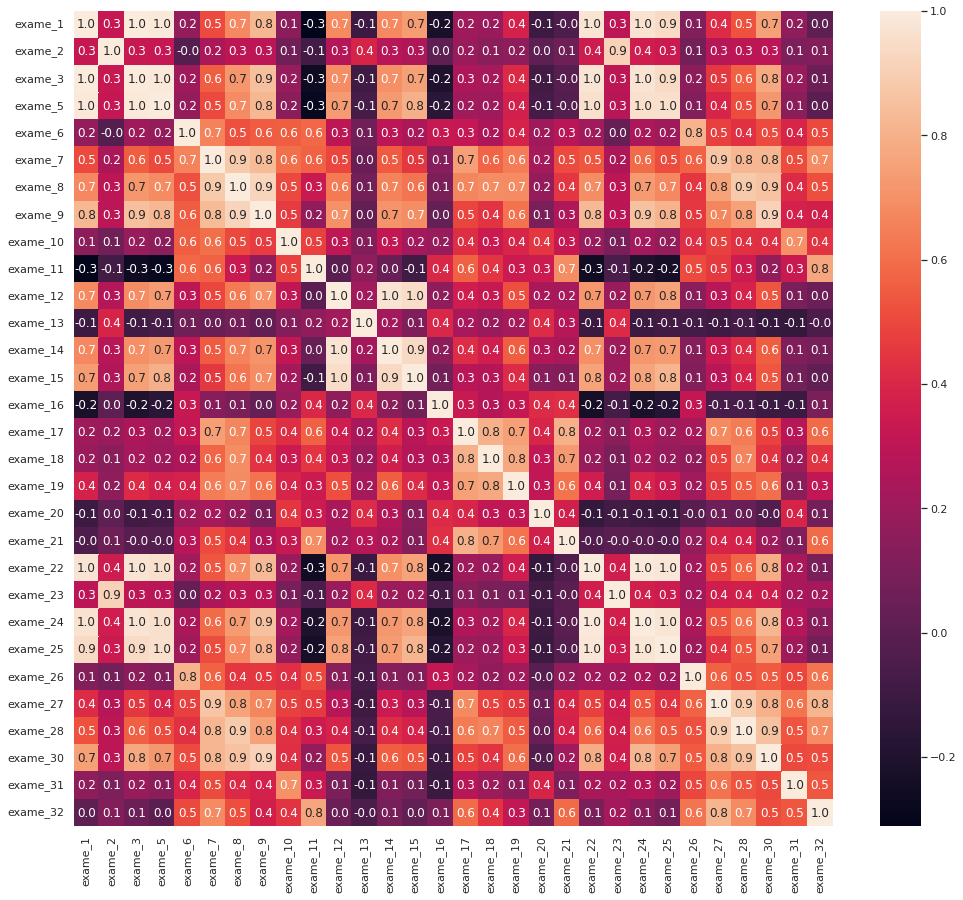

In [229]:
plt.figure(figsize= (17,15))
sns.heatmap(matriz_correlacao, annot= True, fmt ='.1f')

In [230]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]

In [231]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_forte_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_forte_correlacao

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [232]:
valores_exames_v4 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])

In [233]:
classificar(valores_exames_v4)

Resultado da classificação é: 97.66%


# 5 - Algoritimo para selecionar as k, no caso 5, melhores colunas para o algoritimo de classificação.

In [234]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [235]:
selecionar_k_melhores = SelectKBest(chi2, k =5)

In [236]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

In [237]:
try:
  selecionar_k_melhores.fit(treino_x, treino_y)
except:
  print('erro por valores negativos')

erro por valores negativos


In [238]:
valores_exames_v5 = valores_exames_v1.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29'])

In [239]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

selecionar_k_melhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x7fedb64bfcb0>)

In [240]:
treino_k_melhores = selecionar_k_melhores.transform(treino_x)
teste_k_melhores = selecionar_k_melhores.transform(teste_x)

In [270]:
def classificar_k_nelhores(valores):
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

  selecionar_k_melhores.fit(treino_x, treino_y)
  treino_k_melhores = selecionar_k_melhores.transform(treino_x)
  teste_k_melhores = selecionar_k_melhores.transform(teste_x)

  classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
  classificador.fit(treino_k_melhores, treino_y)
  acuracia = classificador.score(teste_k_melhores, teste_y)
  print(f'Resultado da classificação é: {acuracia:.2%}')

In [272]:
classificar_k_nelhores(valores_exames_v5)

Resultado da classificação é: 97.08%


# 6 - Fazendo matrix de confusão para verificar possíveis problemas com a redução dos dados.

In [273]:
from sklearn.metrics import confusion_matrix

In [274]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

selecionar_k_melhores.fit(treino_x, treino_y)
treino_k_melhores = selecionar_k_melhores.transform(treino_x)
teste_k_melhores = selecionar_k_melhores.transform(teste_x)

classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
classificador.fit(treino_k_melhores, treino_y)
previsto_y = classificador.predict(teste_k_melhores)

In [275]:
matriz_confusao = confusion_matrix(teste_y, previsto_y)

In [276]:
matriz_confusao

array([[106,   1],
       [  4,  60]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

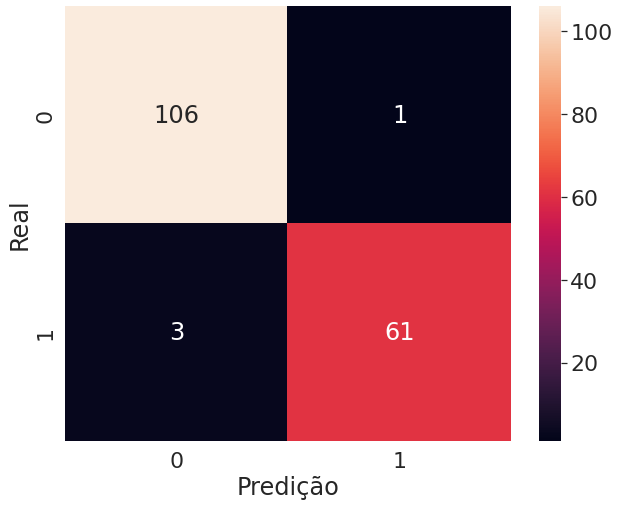

In [303]:
plt.figure(figsize= (10,8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot= True, fmt= 'd').set(xlabel= 'Predição', ylabel= 'Real')

In [287]:
falha_cancer_maligno = matriz_confusao[1,0]/matriz_confusao[1,1]
print(f'A chance desse conjunto de exames falhar na previsão de um cancer maligno é de {falha_cancer_maligno:.2%}')

A chance desse conjunto de exames falhar na previsão de um cancer maligno é de 6.67%


# 7 - Implementando o estimador RFE, Recursive Feature Elimination, para melhorar a seleção dos dados para a modelagem de ML.

In [279]:
from sklearn.feature_selection import RFE

In [280]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

classificador = RandomForestClassifier(n_estimators= 100, random_state=SEED)
classificador.fit(treino_x, treino_y)

RandomForestClassifier(random_state=1234)

In [281]:
selecionar_rfe = RFE(estimator= classificador, n_features_to_select= 5, step= 1)
selecionar_rfe.fit(treino_x, treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
previsto_rfe = classificador.predict(teste_rfe)
acuracia_rfe = classificador.score(teste_rfe, teste_y)
print(f'Resultado da classificação com RFE é {acuracia_rfe:.2%}')

Resultado da classificação com RFE é 95.32%


In [282]:
matriz_confusao_rfe = confusion_matrix(teste_y, previsto_rfe)

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

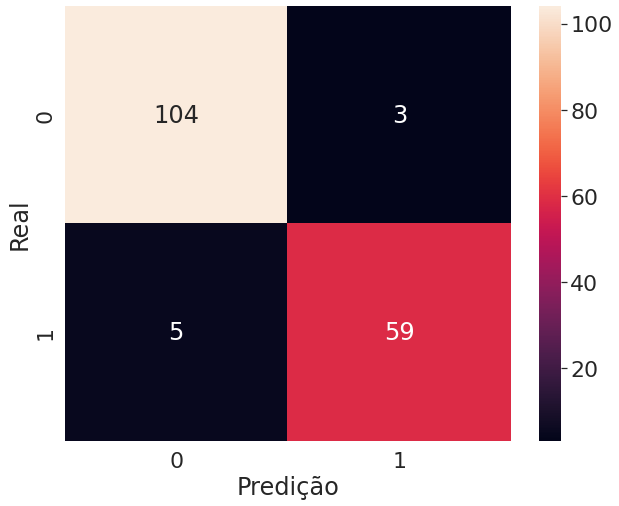

In [283]:
plt.figure(figsize= (10,8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao_rfe, annot= True, fmt= 'd').set(xlabel= 'Predição', ylabel= 'Real')

In [288]:
falha_cancer_maligno = matriz_confusao_rfe[1,0]/matriz_confusao_rfe[1,1]
print(f'A chance desse conjunto de exames falhar na previsão de um cancer maligno é de {falha_cancer_maligno:.2%}')

A chance desse conjunto de exames falhar na previsão de um cancer maligno é de 8.47%


# 8 - Implementando o estimador RFECV, Recursive Feature Elimination with cross-validation, para verificar qual o melhor conjunto de dados para nosso algoritimo de ML.

Resultado da classificação com RFECV é 97.66%


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

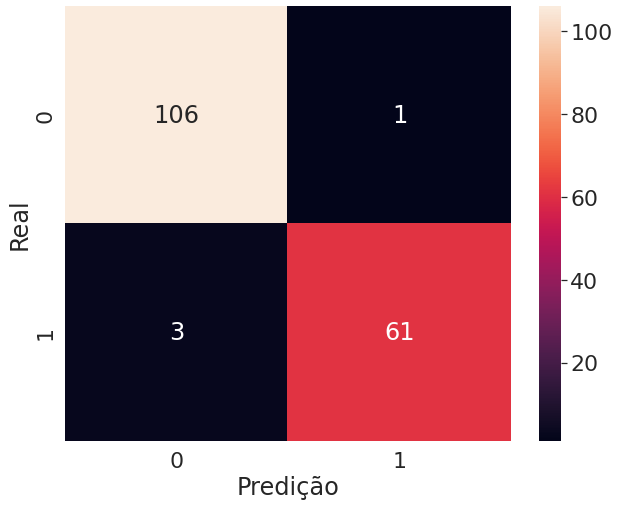

In [289]:
from sklearn.feature_selection import RFECV

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size=0.3, stratify=diagnostico, random_state=SEED)

classificador = RandomForestClassifier(n_estimators=100, random_state = SEED)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

previsto_rfecv = classificador.predict(teste_rfecv)
acuracia_rfecv = classificador.score(teste_rfecv, teste_y)
print(f'Resultado da classificação com RFECV é {acuracia_rfecv:.2%}')

matriz_confusao_rfecv = confusion_matrix(teste_y, previsto_rfecv)
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [292]:
falha_cancer_maligno = matriz_confusao_rfecv[1,0]/matriz_confusao_rfecv[1,1]
print(f'A chance desse conjunto de exames falhar na previsão de um cancer maligno é de {falha_cancer_maligno:.2%}')

A chance desse conjunto de exames falhar na previsão de um cancer maligno é de 4.92%


In [293]:
selecionador_rfecv.n_features_

13

In [294]:
selecionador_rfecv.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [295]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30'],
      dtype='object')

<function matplotlib.pyplot.show>

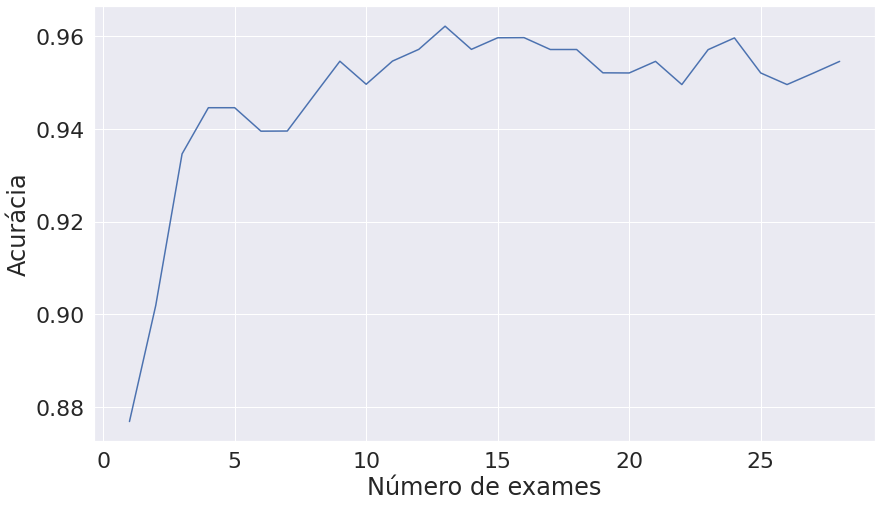

In [307]:
plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

# 9 - Visualizando os dados com seleção de features, PCA e TSNE.

In [297]:
selecionar_rfe = RFE(estimator= classificador, n_features_to_select= 2, step= 1)
selecionar_rfe.fit(treino_x, treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
previsto_rfe = classificador.predict(teste_rfe)
acuracia_rfe = classificador.score(teste_rfe, teste_y)
print(f'Resultado da classificação com RFE é {acuracia_rfe:.2%}')

Resultado da classificação com RFE é 90.64%


In [298]:
valores_exames_v6 = selecionar_rfe.transform(valores_exames_v5)

In [299]:
valores_exames_v6.shape

(569, 2)

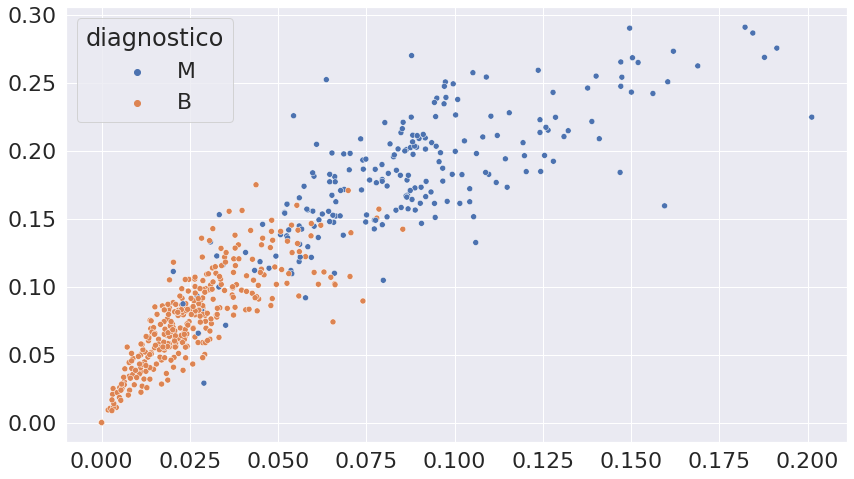

In [308]:
from matplotlib import scale
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v6[:,0], y = valores_exames_v6[:,1], hue = diagnostico)

In [309]:
from sklearn.decomposition import PCA

In [318]:
pca = PCA(n_components= 2)
valores_exames_v7 = pca.fit_transform(valores_exames_v4)

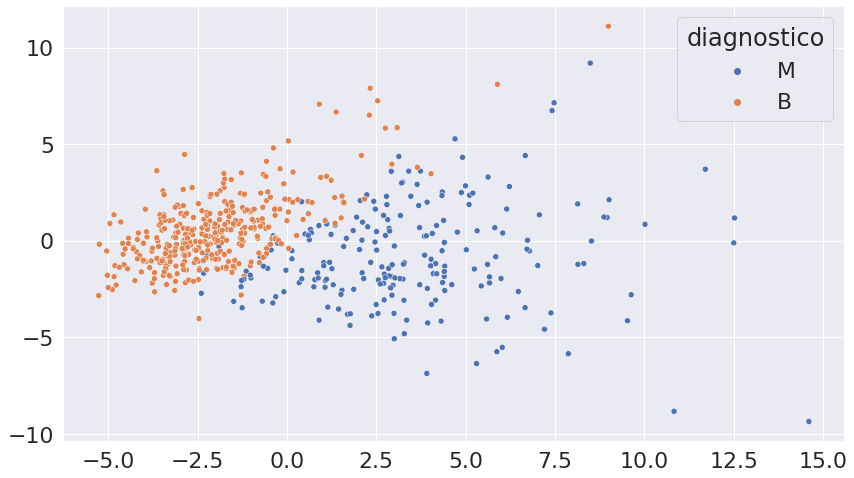

In [320]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [322]:
from sklearn.manifold import TSNE

In [330]:
tsne = TSNE(n_components= 2, init= 'random', learning_rate= 200.0, random_state=SEED)
valores_exames_v8 = tsne.fit_transform(valores_exames_v4)

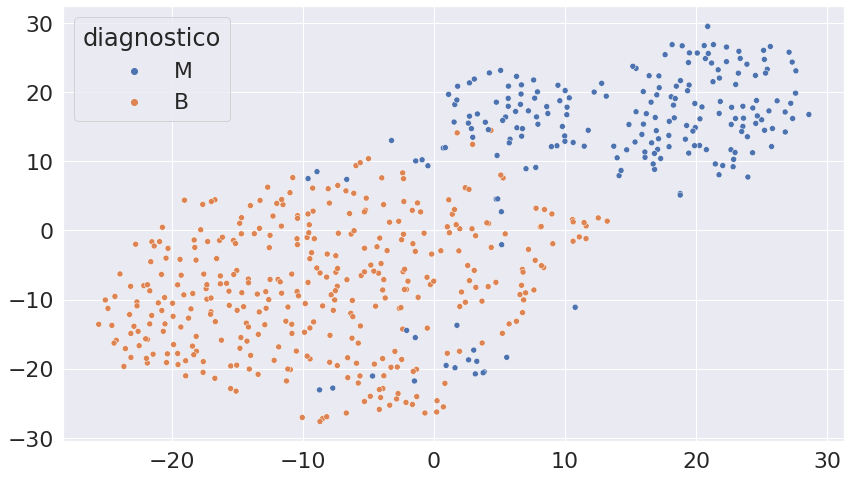

In [331]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)